In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def third_critical_pr(M, g):
    return (1 + 0.5*(g-1)*M**2)**(g/(g-1))

In [3]:
def get_oblique_pr(M, g, beta):
    return (2*g*M**2*np.sin(beta)**2 - (g-1))/(g+1)


In [4]:
def get_beta(M, g, NPR):
    pr = get_shock_jump(M, g, NPR)
    return np.arcsin(np.sqrt((pr*(g+1) + (g-1))/(2*g*M**2)))


In [5]:
def get_shock_jump(M, g, NPR):
    return third_critical_pr(M, g)/NPR


In [6]:
def get_theta(M, g, beta):
    nume = (((g+1)*M**2)/(2*(M**2*np.sin(beta)**2 -1)) -1)*np.tan(beta)
    return np.arctan(1/nume)


In [7]:
def get_M(M, g, beta):
    nume = (g+1)**2*M**4*np.sin(beta)**2 - 4*(M**2*np.sin(beta)**2 -1)*(g*M**2*np.sin(beta)**2 + 1)
    deno = (2*g*M**2*np.sin(beta)**2 - (g-1))*((g-1)*M**2*np.sin(beta)**2 + 2)
    return np.sqrt(nume/deno)


In [8]:
M = 5.0
g = 1.4

nprstart = 40.0
nprend = 70.75

npr = np.arange(nprstart, nprend, 0.25)

beta = get_beta(M, g, npr)

theta = get_theta(M, g, beta)

In [9]:
for i in range(np.shape(npr)[0]):
    print(i, npr[i], beta[i]*180.0/np.pi, theta[i]*180.0/np.pi)

0 40.0 42.66086926771675 30.227523188844167
1 40.25 42.4989004377465 30.111292893477067
2 40.5 42.33885253064097 29.996099005906522
3 40.75 42.18068660717554 29.88192743874903
4 41.0 42.02436486348513 29.768764289657852
5 41.25 41.8698505874174 29.656595843647274
6 41.5 41.717108116981805 29.5454085748301
7 41.75 41.566102800773805 29.435189147630176
8 42.0 41.41680096026131 29.32592441752577
9 42.25 41.26916985382749 29.217601431373925
10 42.5 41.12317764247228 29.110207427361317
11 42.75 40.97879335707995 29.00372983462264
12 43.0 40.83598686716735 28.898156272563465
13 43.25 40.694728851031705 28.79347454992097
14 43.5 40.554990767223366 28.68967266359311
15 43.75 40.416744827272154 28.58673879726294
16 44.0 40.27996396960165 28.484661319843376
17 44.25 40.14462183456903 28.383428783764312
18 44.5 40.01069274057209 28.28302992312232
19 44.75 39.8781516611689 28.183453651711197
20 45.0 39.74697420315833 28.084689060949657
21 45.25 39.61713658557312 27.986725417721143
22 45.5 39.48861

In [10]:
m5data = pd.read_csv('newM5_LnBMach.csv')

In [11]:
m5data.tail()

,M,npr,xt,Hm,xd,yd,xe,Hs,xf,yf,ye,yt,theta3
118,5.0,69.50,1.639927,0.010940,2.138201,0.174127,2.411953,0.007091,1.875330,0.009141,0.007091,0.010940,0.007642
119,5.0,69.75,1.647527,0.008733,2.147169,0.172900,2.420878,0.005660,1.882183,0.007302,0.005660,0.008733,0.006097
120,5.0,70.00,1.655122,0.006533,2.156127,0.171683,2.429800,0.004234,1.889009,0.005467,0.004234,0.006533,0.004559
121,5.0,70.25,1.662710,0.004341,2.165076,0.170474,2.438717,0.002814,1.895811,0.003636,0.002814,0.004341,0.003028
122,5.0,70.50,1.670294,0.002157,2.174016,0.169275,2.447629,0.001398,1.902586,0.001808,0.001398,0.002157,0.001504


In [12]:
XE = m5data['xd'].values*0.25

In [13]:
YE = m5data['yd'].values*0.25

In [14]:
lw = np.sqrt(np.square(XE) + np.square(.25-YE))

In [15]:
domain_height = 0.25 - lw*np.sin(theta)

In [16]:
domain_wall = lw*np.cos(theta)

In [17]:
domain_shock = lw*np.sin(theta)/np.tan(beta)

In [18]:
for i in range(np.shape(domain_shock)[0]):
    print(i, npr[i], theta[i]*180/np.pi, XE[i], domain_height[i], domain_wall[i], YE[i], domain_shock[i])

0 40.0 30.227523188844167 0.25264825 0.10279263876594627 0.25264833085302446 0.1027925 0.15974585678420608
1 40.25 30.111292893477067 0.25530375 0.10193839225388904 0.2553036875134186 0.1019385 0.16158711682737556
2 40.5 29.996099005906522 0.25794975 0.10109604367120137 0.25794977520962037 0.101096 0.1634205533818232
3 40.75 29.88192743874903 0.2605865 0.10026547802736388 0.2605864873743959 0.1002655 0.16524607324857613
4 41.0 29.768764289657852 0.2632145 0.09944616408159873 0.26321445085626965 0.09944625 0.16706404993602345
5 41.25 29.656595843647274 0.26583375000000004 0.09863785590088592 0.2658338102985473 0.09863775000000001 0.1688745534132068
6 41.5 29.5454085748301 0.26844475 0.09784028068978143 0.2684447673955678 0.09784025 0.17067769149176648
7 41.75 29.435189147630176 0.27104724999999996 0.09705330768848647 0.2710472825524952 0.09705325000000001 0.17247342004969216
8 42.0 29.32592441752577 0.273642 0.09627644318843603 0.273641968085036 0.0962765 0.17426211114716997
9 42.25 29.

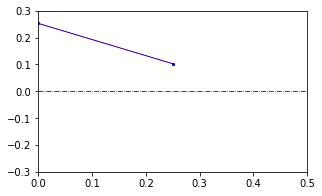

In [19]:
fig, ax = plt.subplots()


_ = ax.plot([0, 0.5],[0, 0], linestyle='-.', color='black',linewidth=0.75)
_ = ax.plot([0, 0.25], [XE[0], domain_height[0]],marker='o', linestyle='-', color='red', linewidth=0.75, markersize='2')
_ = ax.plot([0, 0.25], [XE[0], YE[0]],marker='o', linestyle='-', color='blue', linewidth=0.75, markersize='2')
# drawing for the li and bendor case.
# _ = ax.plot([xalnb, xtlnb],[yalnb, ytlnb],marker='o', linestyle='-', color='red', linewidth=0.75, markersize='2')
# _ = ax.plot([xalnb, xdlnb],[yalnb, ydlnb],marker='o', linestyle='-', color='red', linewidth=0.75, markersize='2')
# _ = ax.plot([xtlnb, xdlnb],[ytlnb, ydlnb],marker='o', linestyle='-', color='red', linewidth=0.75, markersize='2')
# _ = ax.plot([xtlnb, xtlnb],[ytlnb, 0],marker='o', linestyle='-', color='red', linewidth=0.75, markersize='2')
# _ = ax.plot([xdlnb, xelnb],[ydlnb, yelnb],marker='o', linestyle='-', color='red', linewidth=0.75, markersize='2')
# _ = ax.plot([xelnb, xelnb],[0, yelnb],marker='o', linestyle='-', color='red', linewidth=0.75, markersize='2')
# _ = ax.plot([xtlnb, xflnb],[ytlnb, yflnb],marker='o', linestyle='-', color='red', linewidth=0.75, markersize='2')
# _ = ax.plot(xval, yval, color='red', linestyle='dotted', linewidth=1)


# ax.text(0.19, 0.10, 'T',
#          {'style':'italic', 'color': 'k', 'fontsize': 8, 'ha': 'center', 'va': 'center'})

# ax.text(0.205, 0.04, 'm',
#          {'style':'italic', 'color': 'k', 'fontsize': 8, 'ha': 'center', 'va': 'center'})

# ax.text(0.23, 0.07, 's',
#          {'style':'italic', 'color': 'k', 'fontsize': 8, 'ha': 'center', 'va': 'center'})

# ax.text(0.23, 0.105, 'R',
#          {'style':'italic', 'color': 'k', 'fontsize': 8, 'ha': 'center', 'va': 'center'})

# ax.text(0.1, 0.15, 'I',
#          {'style':'italic', 'color': 'k', 'fontsize': 8, 'ha': 'center', 'va': 'center'})

# ax.text(0.26, 0.09, 'EF',
#          {'style':'italic', 'color': 'k', 'fontsize': 8, 'ha': 'center', 'va': 'center'})

# ax.text(0.1, 0.21, 'Jet Boundary',
#          {'style':'italic', 'color': 'k', 'fontsize': 8, 'ha': 'center', 'va': 'center', 'rotation':'-20'})

# ax.text(0.035, 0.1, 'Nozzle Exit',
#          {'style':'italic', 'color': 'k', 'fontsize': 8, 'ha': 'center', 'va': 'center'})


ax.set_xlim(0, 0.5)
ax.set_ylim(-0.3, 0.3)
ax.set_aspect(0.5)

fig.tight_layout()
fig.set_size_inches(5, 2.5)

fig.show()
# fig.savefig('overlay.pdf')

In [20]:
for i in range(np.shape(XE)[0]):
    print (i, ',', npr[i], ',', theta[i]*180/np.pi, ',', lw[i])

0 40.0 	 0.29240585884060616 0.5275698043682664
1 40.25 	 0.2951308397072602 0.525541203023545
2 40.5 	 0.2978430370867556 0.5235306904072669
3 40.75 	 0.30054241709366086 0.5215380206482068
4 41.0 	 0.3032297885256534 0.5195629511046405
5 41.25 	 0.3059053993706633 0.5176052424049103
6 41.5 	 0.3085695599417172 0.5156646584777507
7 41.75 	 0.3112223000816699 0.5137409665734498
8 42.0 	 0.3138643952668891 0.5118339372768249
9 42.25 	 0.3164958718795752 0.509943344512883
10 42.5 	 0.31911704297992294 0.508068965545963
11 42.75 	 0.32172827313219615 0.5062105809730755
12 43.0 	 0.3243297789243612 0.5043679747120843
13 43.25 	 0.3269218987061359 0.5025409339853133
14 43.5 	 0.32950497054255495 0.5007292492991112
15 43.75 	 0.33207877353131515 0.49893271441984205
16 44.0 	 0.33464420372856457 0.49715112634674047
17 44.25 	 0.3372010395374323 0.4953842852820169
18 44.5 	 0.33974961767132644 0.4936319945985632
19 44.75 	 0.3422902745102649 0.49189406080557957
20 45.0 	 0.3448230078333666 0.4

In [21]:
def threeshock_theta(I0, *data):
    M0, g, Theta1 = data
   
    M1 = I0[0]
    M2 = I0[1]
    M3 = I0[2]
    
    Phi1 = I0[3]    
    Phi2 = I0[4]    
    Phi3 = I0[5]
    
    # Theta1 = I0[6]
    Theta2 = I0[7]    
    Theta3 = I0[8]

    P10 = I0[6]
    P21 = I0[9]
    P30 = I0[10]
    
    Rho10 = I0[11]
    Rho21 = I0[12]
    Rho30 = I0[13]
    
    T10 = I0[14]
    T21 = I0[15]
    T30 = I0[16]
    
    f = np.zeros((17),dtype=float)
    
    f[0] =M1-np.sqrt(((1+((g-1)*M0**2*np.sin(Phi1)*np.sin(Phi1)))+((((g+1)**2/4)-g*np.sin(Phi1)*np.sin(Phi1))*M0**4*(np.sin(Phi1))**2))/(((g*M0**2*(np.sin(Phi1))**2)-((g-1)/2))*(((M0**2*(g-1)/2)*(np.sin(Phi1))**2)+1)))
    f[1] =Theta1-np.arctan((2*(1/np.tan(Phi1))*(M0**2*(np.sin(Phi1))**2-1))/(M0**2*(g+np.cos(2*Phi1))+2))
    f[2] =P10-((2/(g+1))*((g*M0**2*(np.sin(Phi1))**2)-(g-1)/2))
    f[3] =Rho10-(((g+1)*M0**2*(np.sin(Phi1))**2)/(((g-1)*M0**2*(np.sin(Phi1))**2)+2))
    f[4] =T10-(P10/(Rho10))
    f[5] =M2-np.sqrt(((1+((g-1)*M1**2*np.sin(Phi2)*np.sin(Phi2)))+((((g+1)**2/4)-g*np.sin(Phi2)*np.sin(Phi2))*M1**4*(np.sin(Phi2))**2))/(((g*M1**2*(np.sin(Phi2))**2)-((g-1)/2))*(((M1**2*(g-1)/2)*(np.sin(Phi2))**2)+1)))
    f[6] =Theta2-np.arctan((2*(1/np.tan(Phi2))*(M1**2*(np.sin(Phi2))**2-1))/(M1**2*(g+np.cos(2*Phi2))+2))
    f[7] =P21-((2/(g+1))*((g*M1**2*(np.sin(Phi2))**2)-(g-1)/2))
    f[8] =Rho21-(((g+1)*M1**2*(np.sin(Phi2))**2)/(((g-1)*M1**2*(np.sin(Phi2))**2)+2))
    f[9] =T21-(P21/(Rho21))
    f[10]=M3-np.sqrt(((1+((g-1)*M0**2*np.sin(Phi3)**2))+((((g+1)**2/4)-g*np.sin(Phi3)**2)*M0**4*(np.sin(Phi3))**2))/(((g*M0**2*(np.sin(Phi3))**2)-((g-1)/2))*(((M0**2*(g-1)/2)*(np.sin(Phi3))**2)+1)))
    f[11]=Theta3-np.arctan((2*(1/np.tan(Phi3))*(M0**2*(np.sin(Phi3))**2-1))/(M0**2*(g+np.cos(2*Phi3))+2))
    f[12]=P30-((2/(g+1))*((g*M0**2*(np.sin(Phi3))**2)-(g-1)/2))
    f[13]=Rho30-(((g+1)*M0**2*(np.sin(Phi3))**2)/(((g-1)*M0**2*(np.sin(Phi3))**2)+2))
    f[14]=T30-(P30/(Rho30))
    f[15]=Theta3-Theta1+Theta2
    f[16]=P30-P21*P10
    
    return f

In [22]:
def threeshock(I0, *data):
    M0, g, P10 = data
   
    M1 = I0[0]
    M2 = I0[1]
    M3 = I0[2]
    
    Phi1 = I0[3]    
    Phi2 = I0[4]    
    Phi3 = I0[5]
    
    Theta1 = I0[6]
    Theta2 = I0[7]    
    Theta3 = I0[8]

    P21 = I0[9]
    P30 = I0[10]
    
    Rho10 = I0[11]
    Rho21 = I0[12]
    Rho30 = I0[13]
    
    T10 = I0[14]
    T21 = I0[15]
    T30 = I0[16]
    
    f = np.zeros((17),dtype=float)
    
    f[0] =M1-np.sqrt(((1+((g-1)*M0**2*np.sin(Phi1)*np.sin(Phi1)))+((((g+1)**2/4)-g*np.sin(Phi1)*np.sin(Phi1))*M0**4*(np.sin(Phi1))**2))/(((g*M0**2*(np.sin(Phi1))**2)-((g-1)/2))*(((M0**2*(g-1)/2)*(np.sin(Phi1))**2)+1)))
    f[1] =Theta1-np.arctan((2*(1/np.tan(Phi1))*(M0**2*(np.sin(Phi1))**2-1))/(M0**2*(g+np.cos(2*Phi1))+2))
    f[2] =P10-((2/(g+1))*((g*M0**2*(np.sin(Phi1))**2)-(g-1)/2))
    f[3] =Rho10-(((g+1)*M0**2*(np.sin(Phi1))**2)/(((g-1)*M0**2*(np.sin(Phi1))**2)+2))
    f[4] =T10-(P10/(Rho10))
    f[5] =M2-np.sqrt(((1+((g-1)*M1**2*np.sin(Phi2)*np.sin(Phi2)))+((((g+1)**2/4)-g*np.sin(Phi2)*np.sin(Phi2))*M1**4*(np.sin(Phi2))**2))/(((g*M1**2*(np.sin(Phi2))**2)-((g-1)/2))*(((M1**2*(g-1)/2)*(np.sin(Phi2))**2)+1)))
    f[6] =Theta2-np.arctan((2*(1/np.tan(Phi2))*(M1**2*(np.sin(Phi2))**2-1))/(M1**2*(g+np.cos(2*Phi2))+2))
    f[7] =P21-((2/(g+1))*((g*M1**2*(np.sin(Phi2))**2)-(g-1)/2))
    f[8] =Rho21-(((g+1)*M1**2*(np.sin(Phi2))**2)/(((g-1)*M1**2*(np.sin(Phi2))**2)+2))
    f[9] =T21-(P21/(Rho21))
    f[10]=M3-np.sqrt(((1+((g-1)*M0**2*np.sin(Phi3)**2))+((((g+1)**2/4)-g*np.sin(Phi3)**2)*M0**4*(np.sin(Phi3))**2))/(((g*M0**2*(np.sin(Phi3))**2)-((g-1)/2))*(((M0**2*(g-1)/2)*(np.sin(Phi3))**2)+1)))
    f[11]=Theta3-np.arctan((2*(1/np.tan(Phi3))*(M0**2*(np.sin(Phi3))**2-1))/(M0**2*(g+np.cos(2*Phi3))+2))
    f[12]=P30-((2/(g+1))*((g*M0**2*(np.sin(Phi3))**2)-(g-1)/2))
    f[13]=Rho30-(((g+1)*M0**2*(np.sin(Phi3))**2)/(((g-1)*M0**2*(np.sin(Phi3))**2)+2))
    f[14]=T30-(P30/(Rho30))
    f[15]=Theta3-Theta1+Theta2
    f[16]=P30-P21*P10
    
    return f

In [23]:
def triplepoint(*data):
    M, g, npr = data

    p0pj = (1 + 0.5*(g-1)*M**2)**(g/(g-1))
    p1 = p0pj/npr
   
    #calculation of normal shock relations for initial conditions
    p3 = (2*g*M**2 - g +1)/(g+1)
    r3 = ((g+1)*M**2)/(2 + (g-1)*M**2)
    t3 = p3/r3
    beta3 = np.pi/2
    theta3 = np.pi/10
    m3 = M/10

    #calcualtion of oblique shock conditions
    beta1 = np.pi/4
    m1 = M*0.8
    r1 = ((g+1)*m1**2*np.sin(beta1)**2)/((2+(g-1)*m1**2*np.sin(beta1)**2))
    t1 = p1/r1

    beta2 = np.pi/4
    theta2 = np.pi/8
    m2 = M*0.6
    r2 = ((g+1)*m2**2*np.sin(beta2)**2)/((2+(g-1)*m2**2*np.sin(beta2)**2))
    p2 = (1 + (2*g*(m2**2*np.sin(beta2)**2-1.))/(g+1))
    t2 = p2/r2

    data = (M, g, p1)
    # print(data)
    # I0 = [m1, m2, 0.5, beta1, beta2, beta3, theta2, theta2, np.pi/12, 15, 12, 2, 2, 3, 4, 5, 6]
    I0 = [m1, m2, m3, beta1, beta2, beta3, theta2, theta2, theta3, p2, p3, r1, r2, r3, t1, t2, t3]
    zthreeshock = fsolve(threeshock, I0, args=data)
    return zthreeshock

In [24]:
M = 5.0
g = 1.4
npr = 50
zthreeshock = triplepoint(*(M, g, npr))

In [25]:
print(zthreeshock)

[ 2.45484256  1.7418992   0.42365343  0.65235238  0.69782168  1.53045651
  0.45840244  0.29966093  0.15874152  2.73607275 28.95256279  3.88925152
  1.99362311  4.99864281  2.72077947  1.37241224  5.79208475]


In [26]:
Hmin = 0.104556422874756 + (lw[0]*np.sin(zthreeshock[4] - zthreeshock[6])*np.sin(zthreeshock[3] - zthreeshock[6]))/(np.sin(zthreeshock[3] + zthreeshock[4] - zthreeshock[6])) 

In [27]:
print(Hmin, 0.25-YE[0])

0.12173029852661935 0.1472075


In [28]:
lw[0]

0.29240585884060616

SyntaxError: invalid syntax (<ipython-input-108-28941e9eb180>, line 1)